In [54]:
import pickle 
import os, sys, glob
import importlib
from copy import deepcopy

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from field.utils import profiling_rad

import analyze_tools.monte_carlo as mc
from analyze_tools.monte_carlo import get_colliding_time
from utilities.etc import categorizing_pickle
import utilities.reduced_parameter as red


In [2]:
root = "/Users/macbook/OneDrive - Emory/Research data/mm_polariton/pickle_jar"
pickled_archive_list = [
    "/result_Jul10th_2024_1421_mu1e3", #0
    "/result_Jul11st_2024_0928", #1
    "/result_Jul11st_2024_1319", #2
    "/result_Jul12nd_2024_0939", #3 
    "/result_Jul13th_2024_0956", #4
    "/result_Jul15th_2024_0902", #5
    "/result_Jul15th_2024_1536", #6
    "/result_Jul16th_2024_1033", #7
    "/result_Jul16th_2024_1539", #8
    "/result_Jul17th_2024_0922"  #9
]
pickled_archive_list = [root + path for path in pickled_archive_list]

In [58]:
pickle_idx = 7
cavity_file_dict = categorizing_pickle(pickled_archive_list[pickle_idx], KEYWORDS = "cavity")
free_file_dict = categorizing_pickle(pickled_archive_list[pickle_idx], KEYWORDS = "free")

In [59]:
pickled_archive_list[pickle_idx]

'/Users/macbook/OneDrive - Emory/Research data/mm_polariton/pickle_jar/result_Jul16th_2024_1033'

In [60]:
# {max colliding time of sim cycle : {atoms, cavity, list of colliding time}}
max_time_vs_sys = {}

for i, PICKLE_PATH in cavity_file_dict.items():
    with open(PICKLE_PATH, "rb") as handle:
        result = pickle.load(handle)

    atoms = result["atoms"]
    cavity_field = result["cavity_field"]
    mu0 = result["mu0"]
    colliding_time = mc.get_colliding_time(atoms, mu0, 1e-3)

    max_time_vs_sys.update(
        {max(colliding_time): (deepcopy(atoms), deepcopy(cavity_field), deepcopy(colliding_time))})
    

print(result['temperature'])

325


In [61]:
# sorted maximum colliding time for each sim cycle
sorted_sys_colliding_time = sorted(max_time_vs_sys.keys())

In [62]:
atoms, cavity_field, colliding_time = max_time_vs_sys[sorted_sys_colliding_time[-1]]

In [63]:
sum_H = np.sum(cavity_field.history["energy"], axis = 1)
t = np.array(cavity_field.history['t']) * red.time_unit * 1e12

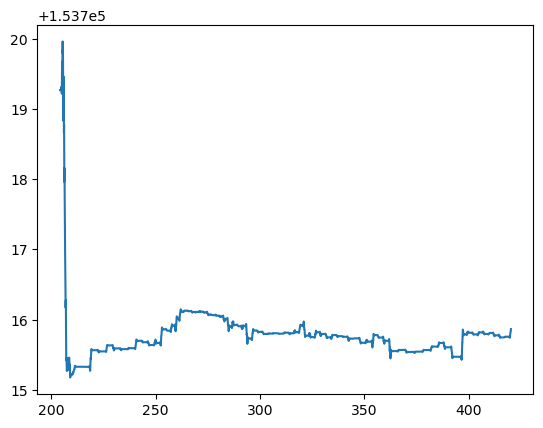

In [64]:
fig, ax = plt.subplots()
ax.plot(t, sum_H)
#ax.set_xlim(88,92)

In [68]:
cavity_field_hamiltonian = np.array(cavity_field.history["energy"])
np.std(cavity_field_hamiltonian[t > 225,:],axis = 0)

array([0.04277118, 0.00066146, 0.02349164, 0.03873501, 0.07583702,
       0.06794498, 0.02500244, 0.02952695, 0.10806639, 0.04608434,
       0.09165964, 0.00064041, 0.0503635 , 0.07326459, 0.0103867 ,
       0.04271538, 0.07956522, 0.04443724, 0.02571791, 0.02429103,
       0.00154939, 0.01909769, 0.01960174, 0.02486855, 0.0169428 ,
       0.09308559, 0.01093458, 0.00040725, 0.02432211, 0.02613669,
       0.02885598, 0.02303335, 0.03232255])

/Users/macbook/miniconda3/envs/polariton_mm/lib/python3.12/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/macbook/miniconda3/envs/polariton_mm/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


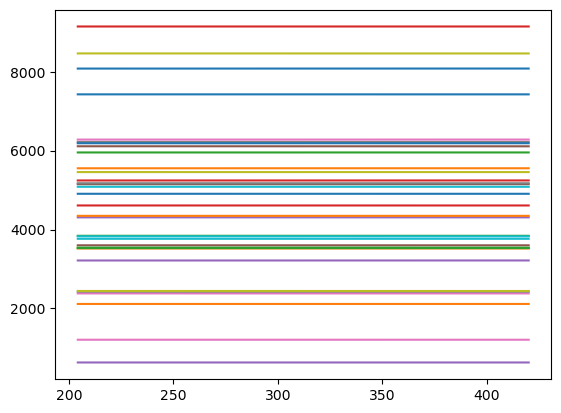

In [71]:
fig, ax = plt.subplots()
ax.plot(t, cavity_field_hamiltonian)